<a href="https://colab.research.google.com/github/ReemYounis123/GenAI-projects/blob/main/Heartbeat_Categorization_Reem_Younis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ECG Heartbeat Categorization**

**Problem Undestanding**

**The Problem: Heartbeat Classification**

**Dataset** : "Arrhythmia Dataset"
- Number of Samples: 109446
- Number of Categories: 5
- Sampling Frequency: 125Hz
- Data Source: Physionet's MIT-BIH Arrhythmia Dataset
- Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]

In [5]:
classes = {0:'Normal beat',
           1:'Supraventricular premature beat',
           2:'Premature ventricular contraction',
           3:"Fusion of ventricular and normal beat",
           4:'Unclassifiable beat'}

#Data Loading

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns

from sklearn  import linear_model
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn import preprocessing

from sklearn.svm import SVC

from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report


In [7]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [8]:
!kaggle datasets download -d shayanfazeli/heartbeat

Dataset URL: https://www.kaggle.com/datasets/shayanfazeli/heartbeat
License(s): unknown
 93% 92.0M/98.8M [00:00<00:00, 116MB/s]
100% 98.8M/98.8M [00:00<00:00, 104MB/s]


In [9]:
!unzip heartbeat.zip

Archive:  heartbeat.zip
  inflating: mitbih_test.csv         
  inflating: mitbih_train.csv        
  inflating: ptbdb_abnormal.csv      
  inflating: ptbdb_normal.csv        


In [10]:
train = pd.read_csv('mitbih_train.csv', header=None)
test = pd.read_csv('mitbih_test.csv', header=None)

In [11]:
train.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


There are 188 columns in our Dataset.
the last column is the label

#EDA

In [12]:
print(train.columns)

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       178, 179, 180, 181, 182, 183, 184, 185, 186, 187],
      dtype='int64', length=188)


In [13]:
train.columns=train.columns.astype(str)

In [14]:
train.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '178', '179', '180', '181', '182', '183', '184', '185', '186', '187'],
      dtype='object', length=188)

In [15]:
train['187']

,187
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
87549,4.0
87550,4.0
87551,4.0
87552,4.0


In [16]:
test.columns=test.columns.astype(str)

In [17]:
train_Y_SVM = train['187'].astype(int)

In [18]:
train_Y_SVM  = train['187'].map(classes)

In [19]:
train_Y_SVM .unique()

array(['Normal beat', 'Supraventricular premature beat',
       'Premature ventricular contraction',
       'Fusion of ventricular and normal beat', 'Unclassifiable beat'],
      dtype=object)

In [20]:
test_Y_SVM = test['187'].astype(int)
test_Y_SVM  = test['187'].map(classes)
test_Y_SVM .unique()

array(['Normal beat', 'Supraventricular premature beat',
       'Premature ventricular contraction',
       'Fusion of ventricular and normal beat', 'Unclassifiable beat'],
      dtype=object)

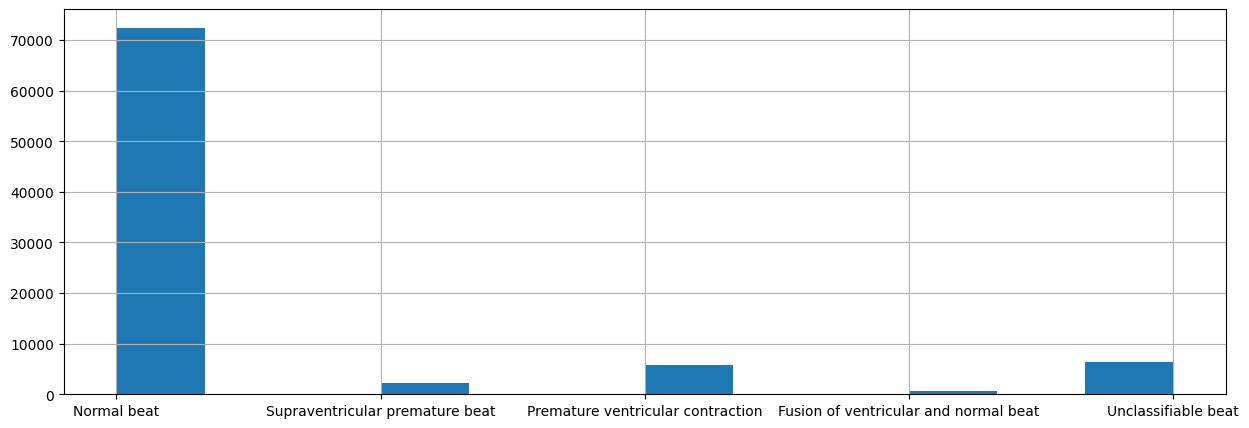

In [21]:
train_Y_SVM.hist(bins=12,figsize=(15,5))
plt.show()

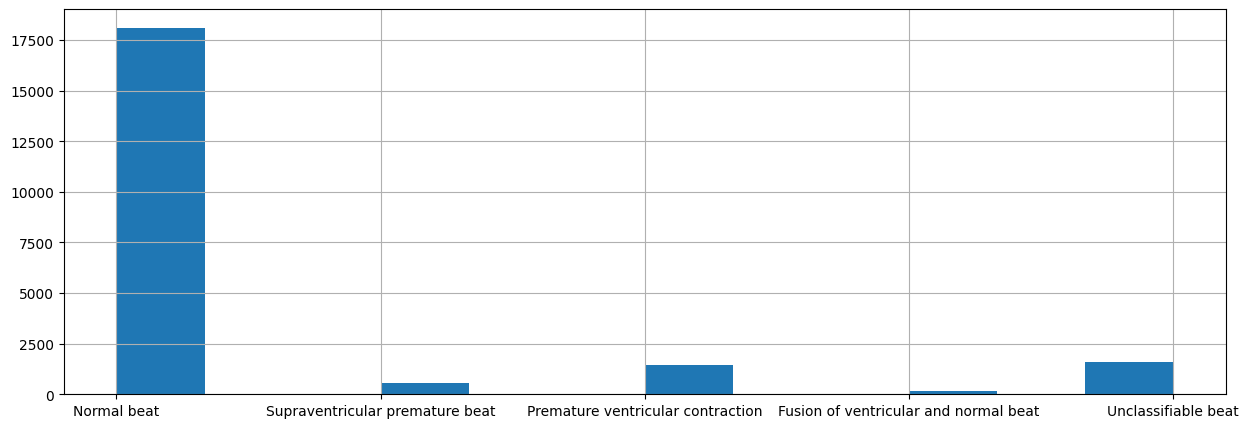

In [22]:
test_Y_SVM.hist(bins=12,figsize=(15,5))
plt.show()

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [24]:
train.shape

(87554, 188)

In [25]:
train.duplicated().sum()

0

In [26]:
train.iloc[:,187].duplicated().sum()

87549

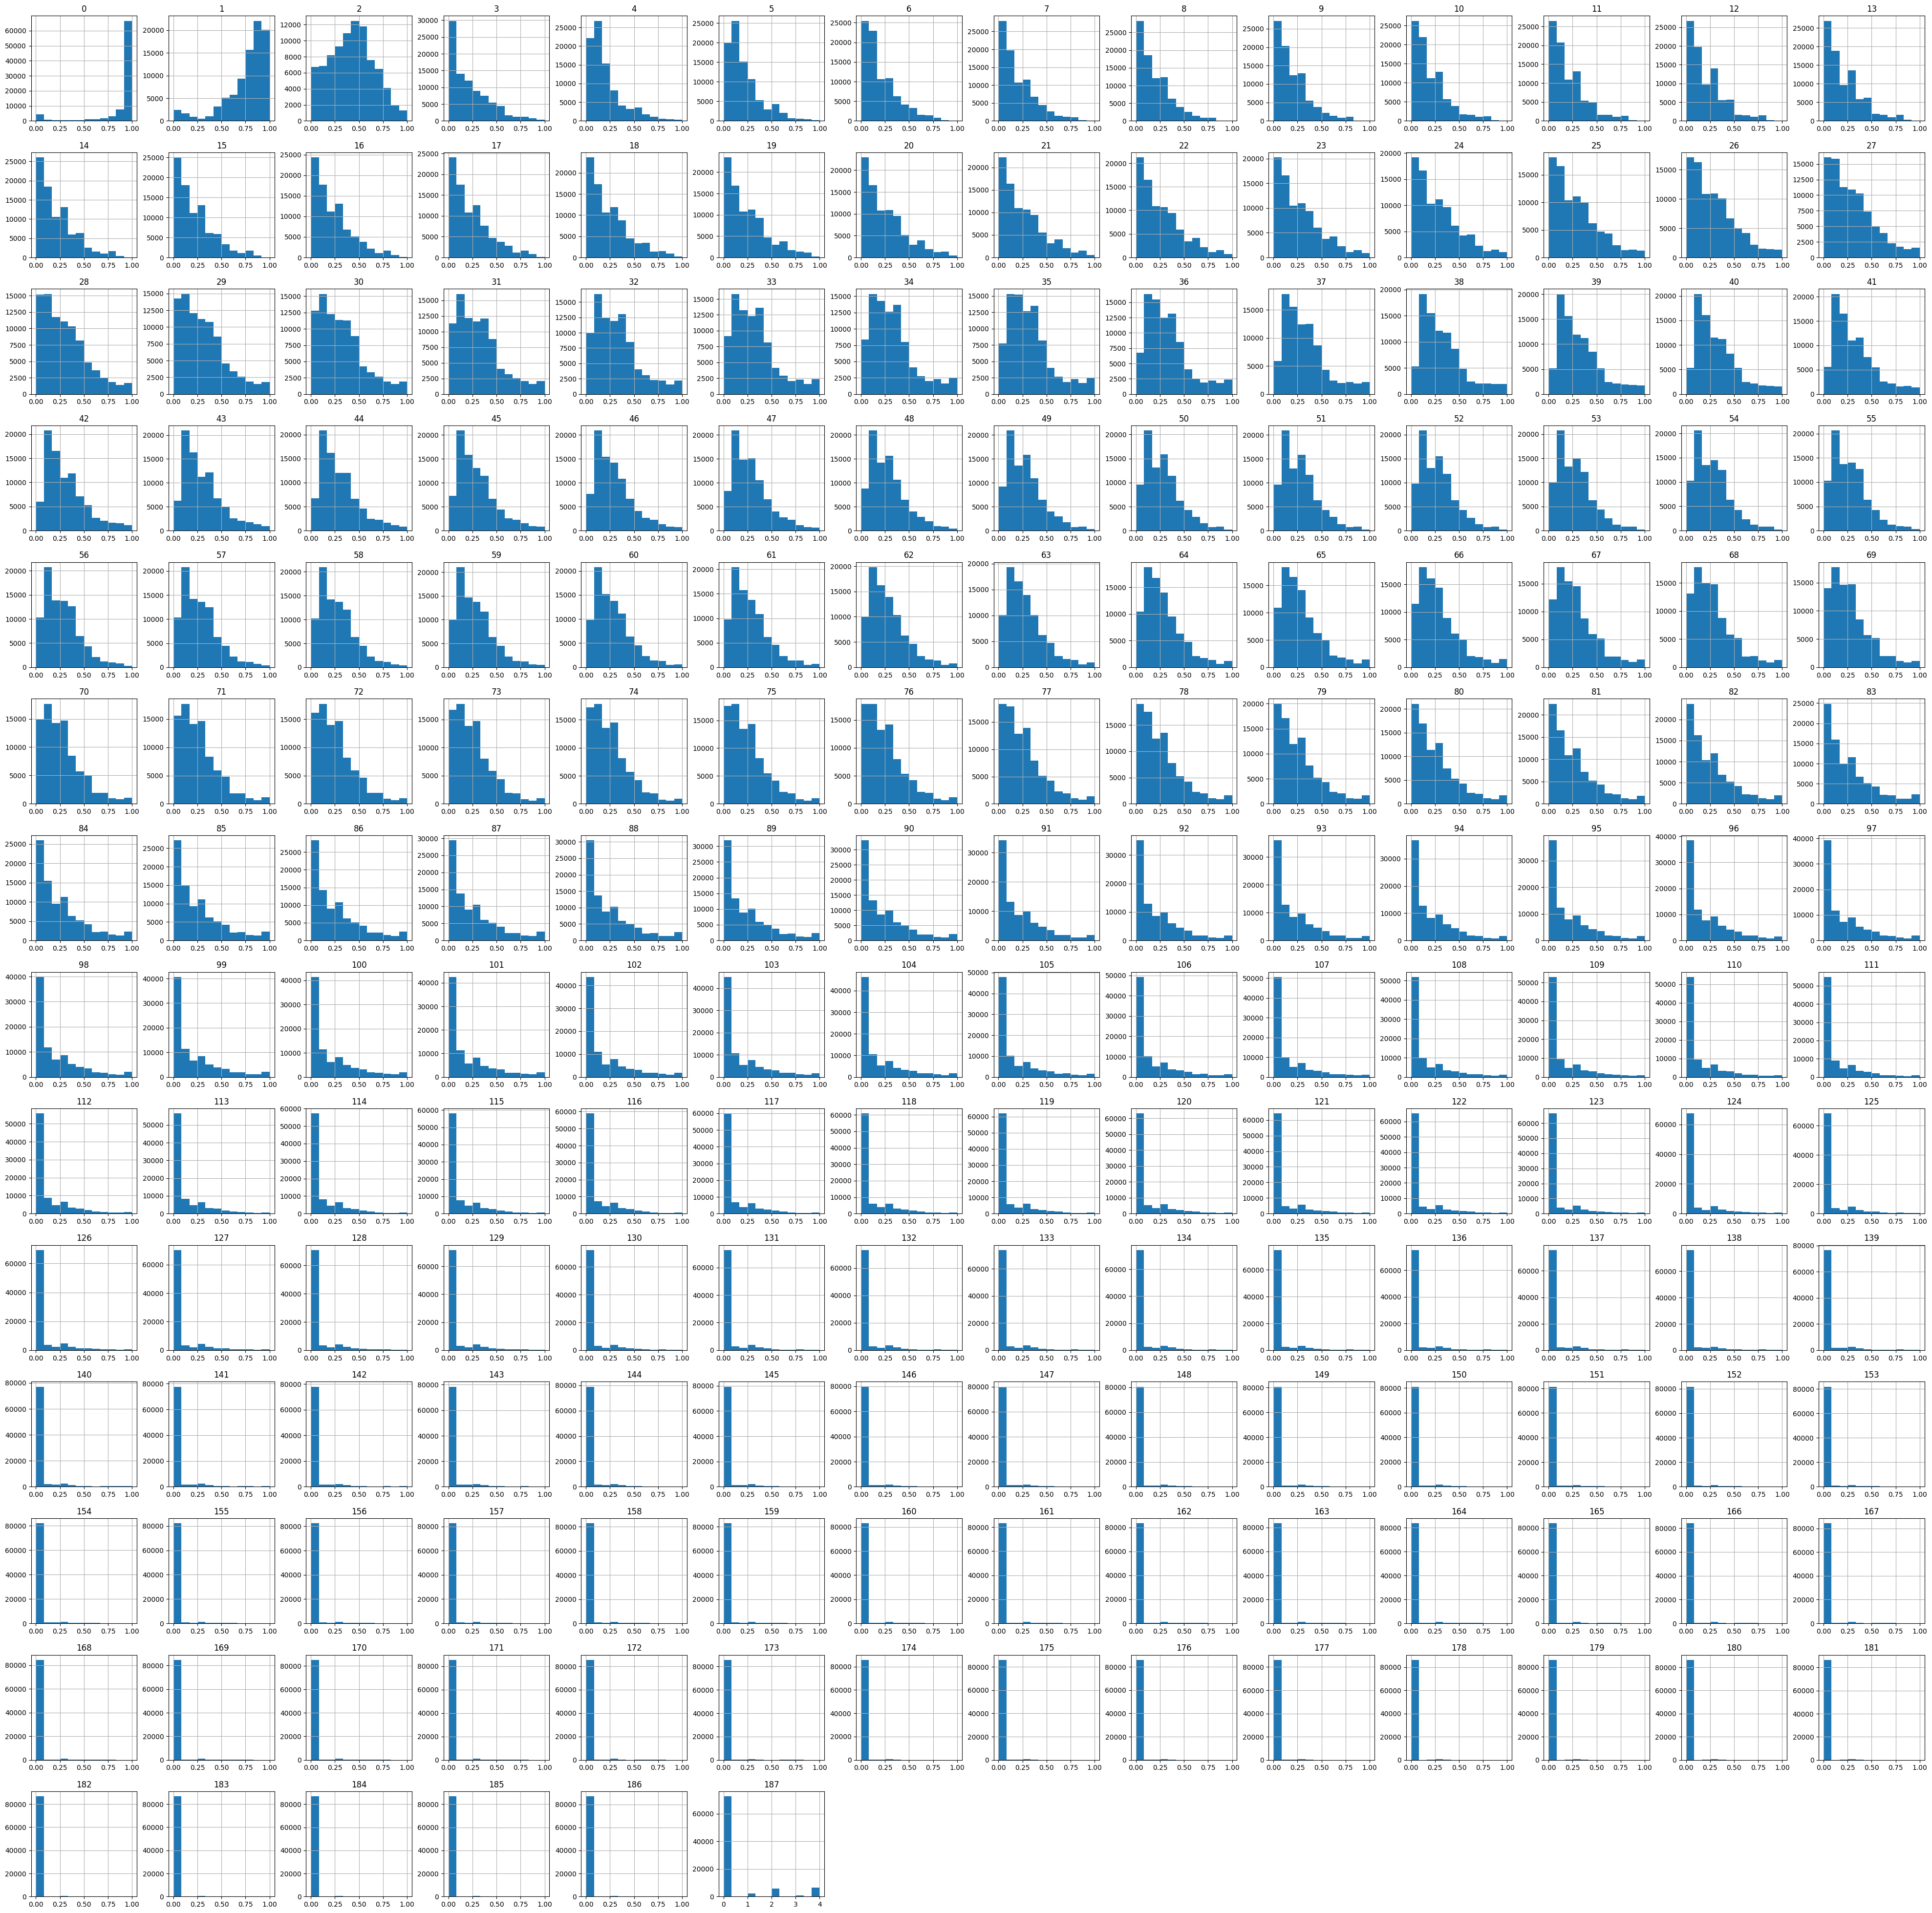

In [27]:
train.hist(bins=12,figsize=(50,50))
plt.show()

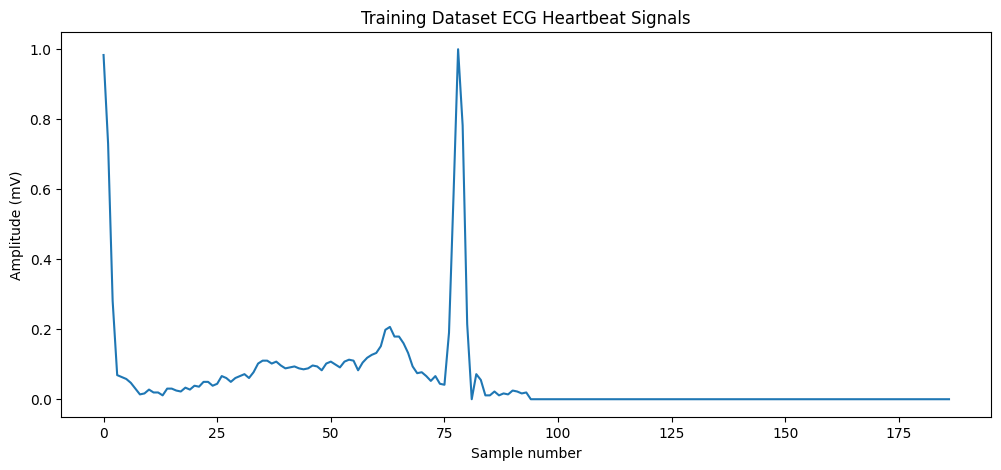

In [28]:
x_axis=np.arange(0,187)

fig=plt.figure(figsize=(12,5))

plt.plot(x_axis, train.iloc[200,:187], label='linear')  # Plot some data on the (implicit) Axes.
plt.xlabel('Sample number')
plt.ylabel('Amplitude (mV)')
plt.title("Training Dataset ECG Heartbeat Signals")

plt.show()

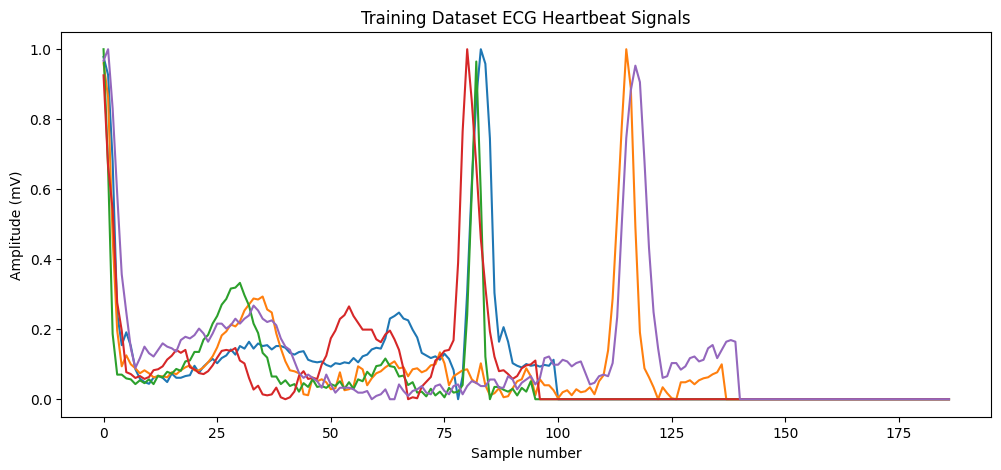

In [29]:
x_axis=np.arange(0,187)

fig=plt.figure(figsize=(12,5))
for i in range(5):
  plt.plot(x_axis, train.iloc[i,:187], label='linear')  # Plot some data on the (implicit) Axes.
  plt.xlabel('Sample number')
  plt.ylabel('Amplitude (mV)')
  plt.title("Training Dataset ECG Heartbeat Signals")

plt.show()


In [ ]:
test.hist(bins=12,figsize=(50,50))
plt.show()

In [ ]:
for i in range(145,187):
  train = train.drop(columns=str(i))
  test = test.drop(columns=str(i))
print(train.shape)
print(test.shape)


In [ ]:
train.info()

In [ ]:
test.info()

In [ ]:
x_axis=np.arange(0,145)

fig=plt.figure(figsize=(12,5))

plt.plot(x_axis, test.iloc[200,:145], label='linear')  # Plot some data on the (implicit) Axes.
plt.xlabel('Sample number')
plt.ylabel('Amplitude (mV)')
plt.title("Testing Dataset ECG Heartbeat Signals")

plt.show()

In [ ]:
x_axis=np.arange(0,145)

fig=plt.figure(figsize=(12,5))
for i in range(5):
  plt.plot(x_axis, test.iloc[i,:145], label='linear')  # Plot some data on the (implicit) Axes.
  plt.xlabel('Sample number')
  plt.ylabel('Amplitude (mV)')
  plt.title("Testing Dataset ECG Heartbeat Signals")

plt.show()

# **Data Preprocessing**

In [ ]:
train_X=train.drop(columns='187')
train_Y=train['187']
print(train_X.shape)
print(train_Y.shape)
print(train.shape)

In [ ]:
train_X_normalized = normalize(train_X,axis=0)
#train_Y_normalized= normalize(train_Y.reshape(-1,1),axis=0)
print(train_X_normalized.shape)
#print(train_Y_normalized.shape)


In [ ]:
from imblearn.under_sampling import TomekLinks

# Instantiate the TomekLinks sampler
tl = TomekLinks()

# Fit the sampler to the data
x_resampled, y_resampled = tl.fit_resample(train_X_normalized, train_Y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', train_X_normalized.shape)
print('Resampled dataset shape:', x_resampled.shape)

In [ ]:
test_X=test.drop(columns='187')
test_Y=test['187']

In [ ]:
test_X_normalized = normalize(test_X,axis=0)

print(test_X_normalized.shape)


In [ ]:
from imblearn.under_sampling import TomekLinks

# Instantiate the TomekLinks sampler
t2 = TomekLinks()

# Fit the sampler to the data
test_x_resampled, test_y_resampled = t2.fit_resample(test_X_normalized, test_Y)

# Print the original and resampled dataset shapes
print('Original dataset shape:', test_X_normalized.shape)
print('Resampled dataset shape:', test_x_resampled.shape)

#Modeling

In [ ]:

# Pipeline with PCA and SVM
clf = Pipeline([
    ("pca",PCA(n_components=0.99)),
    ("svm",SVC(C=10,kernel='rbf')),
])


#Training

In [ ]:
#Training the data

clf.fit(x_resampled,y_resampled)

#Evaluation

In [ ]:

# score of testing data
print("Score is:",clf.score(test_x_resampled,test_y_resampled))

# precision recall f1-score support report
y_pred = clf.predict(test_x_resampled)
report = classification_report(test_y_resampled, y_pred)
print("Classificaion Report")
print(report)

Score is: 0.8488612836438924
Classificaion Report
              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     18050
         1.0       0.57      0.14      0.23       512
         2.0       0.69      0.20      0.31      1412
         3.0       1.00      0.07      0.13       162
         4.0       0.94      0.10      0.19      1599

    accuracy                           0.85     21735
   macro avg       0.81      0.30      0.35     21735
weighted avg       0.84      0.85      0.80     21735



[[17921    52    66     0    11]
 [  428    73    11     0     0]
 [ 1130     4   278     0     0]
 [  133     0    18    11     0]
 [ 1400     0    32     0   167]]


Text(0.5, 23.52222222222222, 'Predicted')

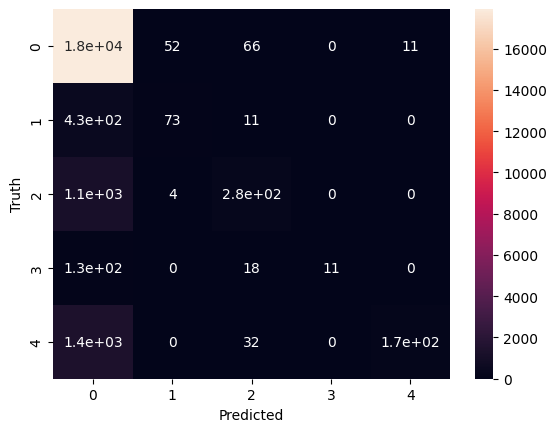

In [ ]:

# confusion matrix
cm = confusion_matrix(test_y_resampled,y_pred)
print(cm)

# using seaborn
sns.heatmap(cm,annot=True)
plt.ylabel("Truth")
plt.xlabel("Predicted")

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.99)
pca.fit(x_resampled)
x_pca = pca.transform(x_resampled)
print(pca.explained_variance_ratio_)
print(x_pca.shape)
print(x_pca.dtype)


[0.39908401 0.15368027 0.0708482  0.04127551 0.02788158 0.02366176
 0.02131559 0.01997123 0.01817927 0.01678118 0.01489655 0.0141809
 0.0136934  0.01212225 0.01094245 0.00967859 0.00884638 0.00835209
 0.00778283 0.00722303 0.00655372 0.00580727 0.00519491 0.00488379
 0.00458624 0.00431361 0.00409139 0.00384361 0.00367308 0.00361386
 0.00353184 0.00327494 0.00297405 0.00268617 0.00250033 0.00228838
 0.00211678 0.00200221 0.00196049 0.00190437 0.00180906 0.00167608
 0.00152763 0.00140201 0.00130198 0.00120261 0.00112025 0.00103381
 0.00098136 0.00091757 0.00086299 0.00080309 0.00075104 0.00069156
 0.00063168 0.00059036 0.00054094]
(87093, 57)
float64


In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.InputLayer(input_shape=[57,57]))
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))

model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 57, 200)           11600     
                                                                 
 dense_21 (Dense)            (None, 57, 100)           20100     
                                                                 
 dense_22 (Dense)            (None, 57, 10)            1010      
                                                                 
Total params: 32710 (127.77 KB)
Trainable params: 32710 (127.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss="SparseCategoricalCrossentropy",
              optimizer="Adam",
              metrics=['accuracy'])

In [ ]:
y_resampled.unique()

array([0., 1., 2., 3., 4.])

In [ ]:
history = model.fit(x_pca, y_resampled, batch_size=100 ,epochs=30)

Epoch 1/30
871/871 [==============================] - 3s 2ms/step - loss: 0.5742 - accuracy: 0.8567
Epoch 2/30
871/871 [==============================] - 2s 2ms/step - loss: 0.3637 - accuracy: 0.8998
Epoch 3/30
871/871 [==============================] - 3s 3ms/step - loss: 0.3212 - accuracy: 0.9140
Epoch 4/30
871/871 [==============================] - 3s 4ms/step - loss: 0.2977 - accuracy: 0.9171
Epoch 5/30
871/871 [==============================] - 4s 4ms/step - loss: 0.2809 - accuracy: 0.9208
Epoch 6/30
871/871 [==============================] - 2s 2ms/step - loss: 0.2628 - accuracy: 0.9271
Epoch 7/30
871/871 [==============================] - 2s 2ms/step - loss: 0.2415 - accuracy: 0.9336
Epoch 8/30
871/871 [==============================] - 2s 2ms/step - loss: 0.2172 - accuracy: 0.9407
Epoch 9/30
871/871 [==============================] - 2s 2ms/step - loss: 0.1985 - accuracy: 0.9467
Epoch 10/30
871/871 [==============================] - 2s 3ms/step - loss: 0.1823 - accuracy: 0.9522

In [ ]:
pca_2 = PCA(n_components=0.99)
pca_2.fit(x_resampled)
test_x_pca = pca_2.transform(test_x_resampled)
print(pca_2.explained_variance_ratio_)
print(test_x_pca.shape)
print(test_x_pca.dtype)

[0.39908401 0.15368027 0.0708482  0.04127551 0.02788158 0.02366176
 0.02131559 0.01997123 0.01817927 0.01678118 0.01489655 0.0141809
 0.0136934  0.01212225 0.01094245 0.00967859 0.00884638 0.00835209
 0.00778283 0.00722303 0.00655372 0.00580727 0.00519491 0.00488379
 0.00458624 0.00431361 0.00409139 0.00384361 0.00367308 0.00361386
 0.00353184 0.00327494 0.00297405 0.00268617 0.00250033 0.00228838
 0.00211678 0.00200221 0.00196049 0.00190437 0.00180906 0.00167608
 0.00152763 0.00140201 0.00130198 0.00120261 0.00112025 0.00103381
 0.00098136 0.00091757 0.00086299 0.00080309 0.00075104 0.00069156
 0.00063168 0.00059036 0.00054094]
(21735, 57)
float64


In [ ]:
model.evaluate(test_x_pca, test_y_resampled)
test_y_resampled.shape

680/680 [==============================] - 1s 2ms/step - loss: 0.4503 - accuracy: 0.9064


(21735,)

In [ ]:
X_new = test_x_pca[:10]
y_proba = model.predict(X_new)
y_pred = y_proba.argmax(axis=-1)
y_pred

1/1 [==============================] - 0s 33ms/step


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_new = test_y_resampled[:10]
y_new

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
Name: 187, dtype: float64

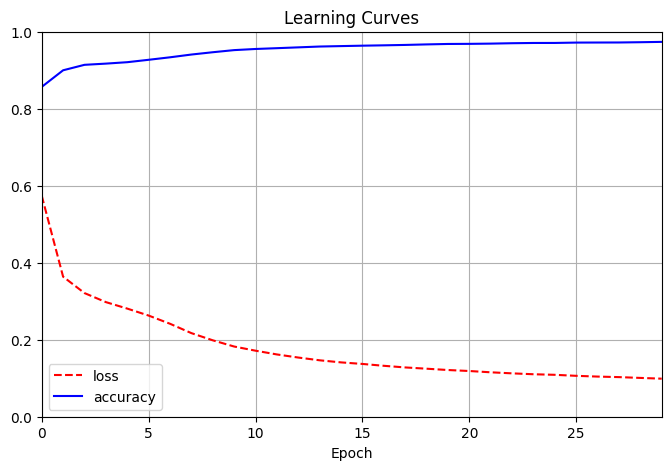

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "b-",'g'])
plt.title("Learning Curves")
plt.show()
# It is clear that the loss equals the mse

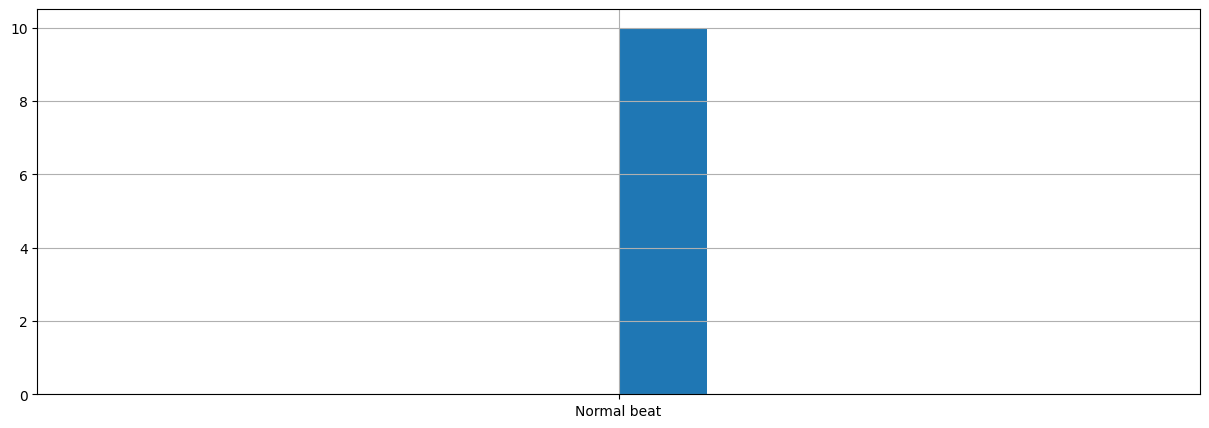

In [ ]:
testing=y_new.astype(int).map(classes)
testing.hist(bins=12,figsize=(15,5))
plt.show()